In [1]:
 from google.colab import files

uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Exploratory Data Analysis (EDA):**

In [3]:
# Load dataset and checking the shape of the dataset

df= pd.read_csv("Titanic_train.csv")
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Checking for data type and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Basic statistics

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Checking for null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Droppping "Cabin" column as it contains several null values.
# Also, dropping "Name" and "Ticket" column as it not relevent for analysis

df.drop(columns= ["Cabin","Name", "Ticket"] , inplace= True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [9]:
# Replace null values in Age column with median

df.fillna(df["Age"].median(), inplace=True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
# Checking for duplicates

df[df.duplicated].shape

(0, 9)

In [12]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

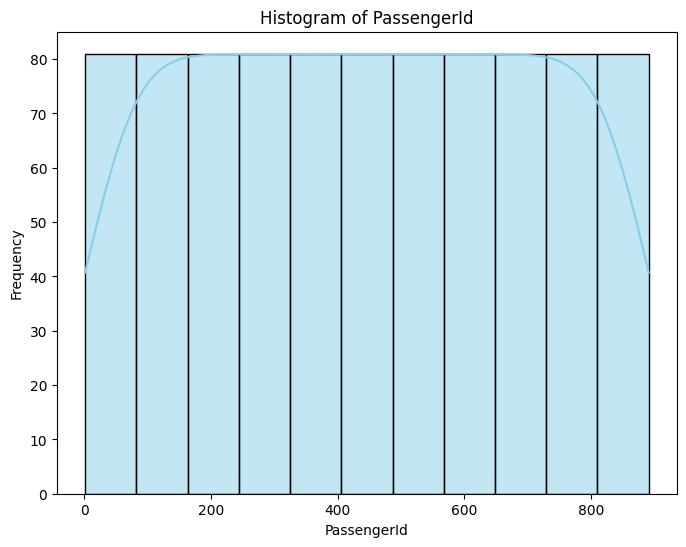

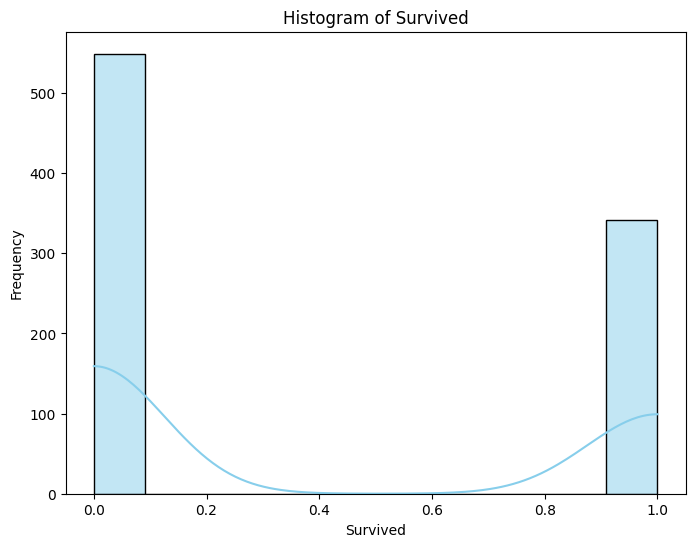

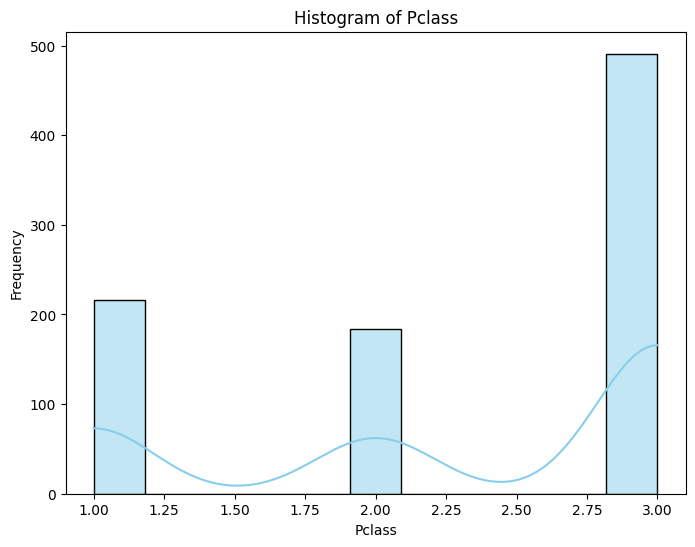

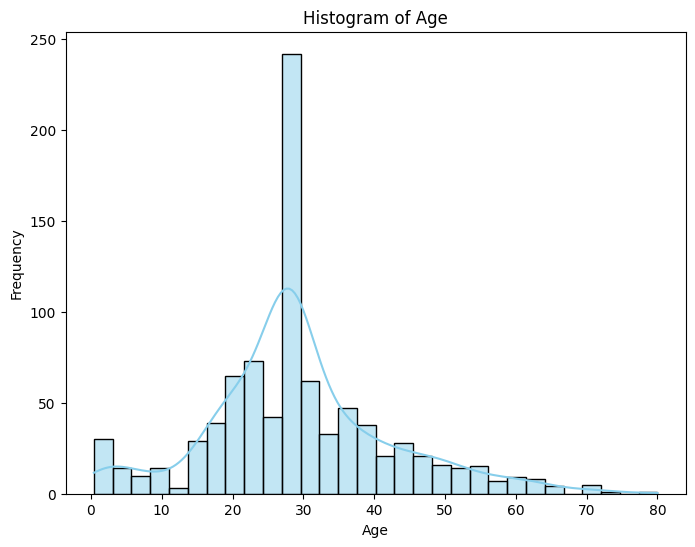

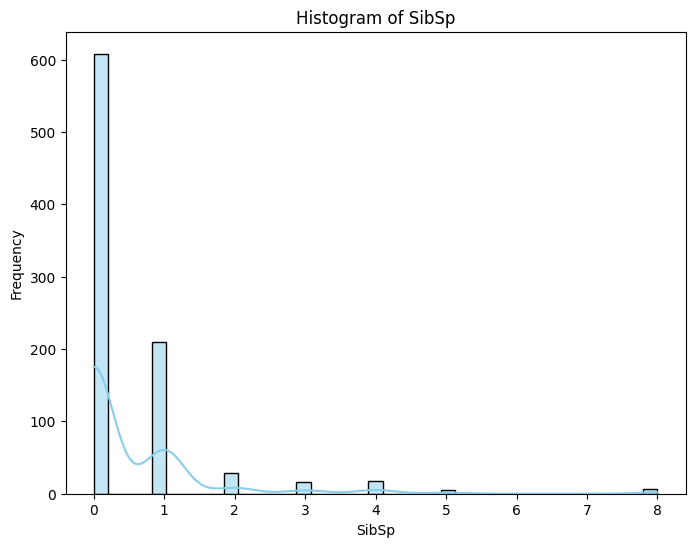

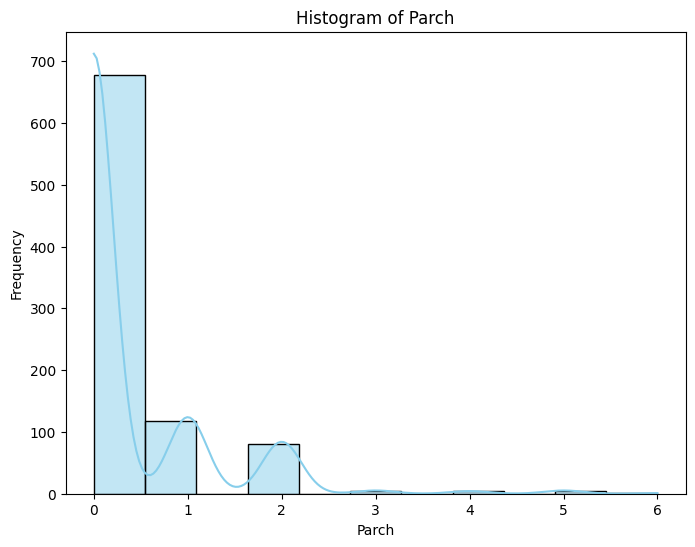

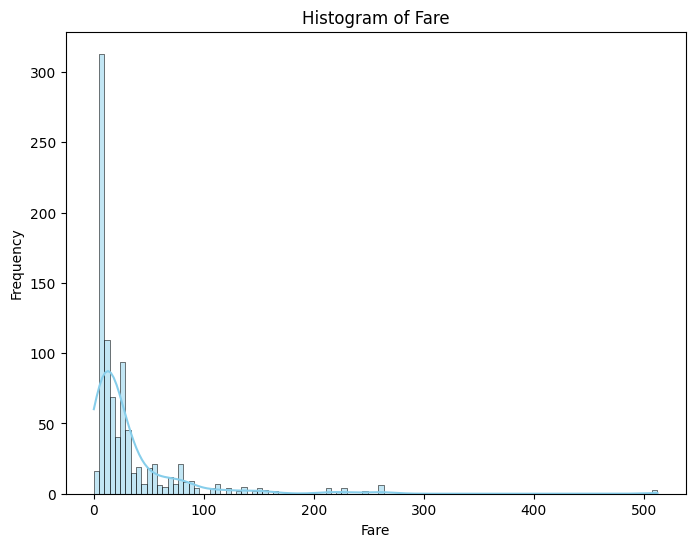

In [13]:
# Histogram to visualize the distribution of numerical attributes

for i in df.columns:
  if df[i].dtype== "int64" or df[i].dtype== "float64":
    plt.figure(figsize=[8,6])
    sns.histplot(df[i],kde= True, color= "skyblue")
    plt.title(f"Histogram of {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

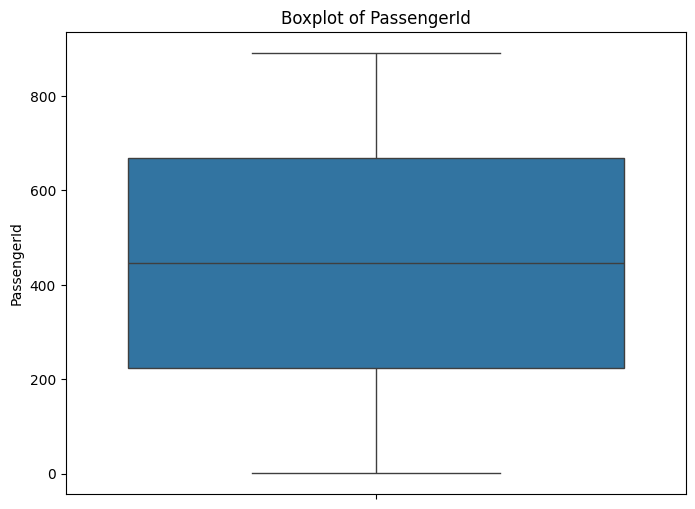

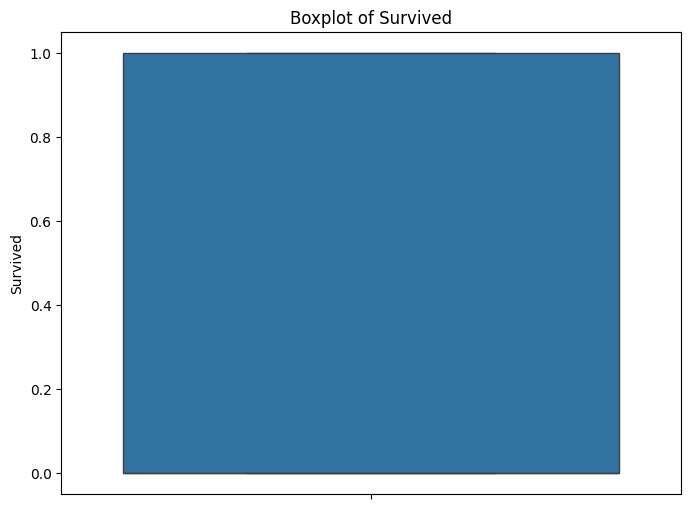

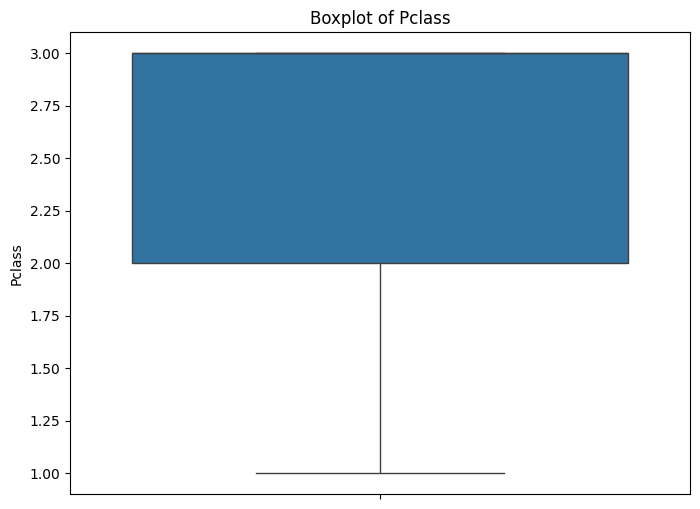

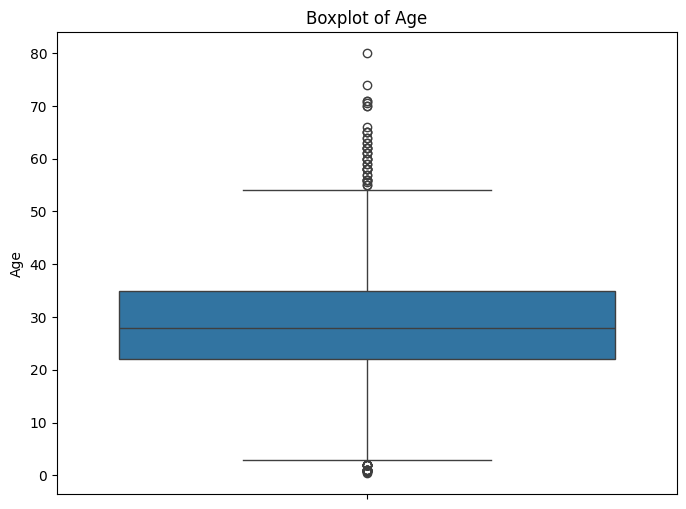

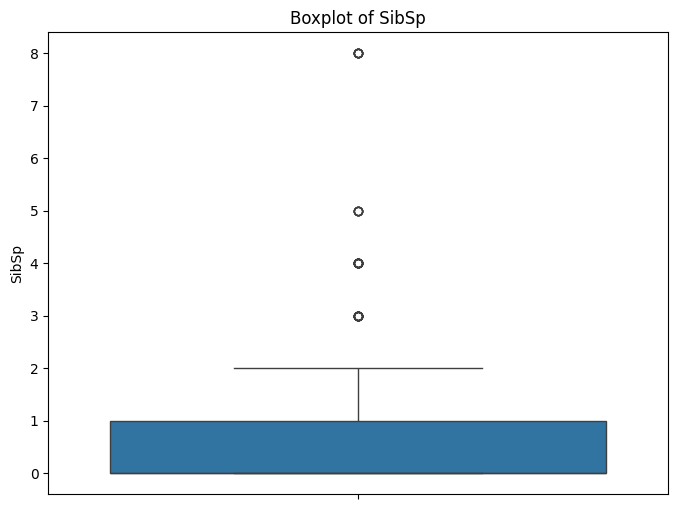

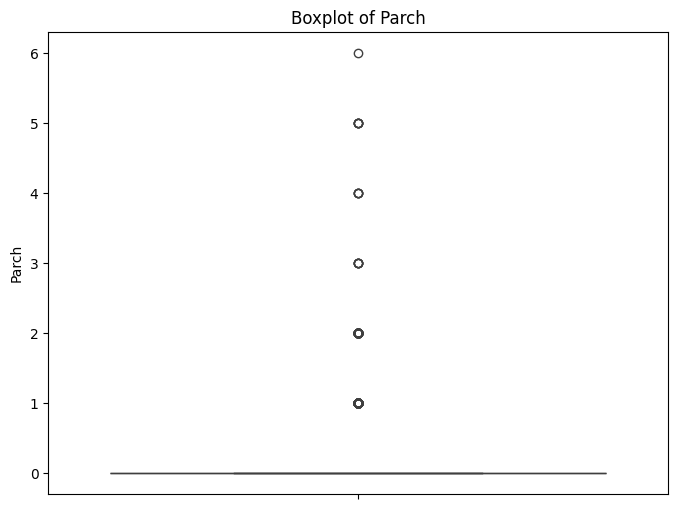

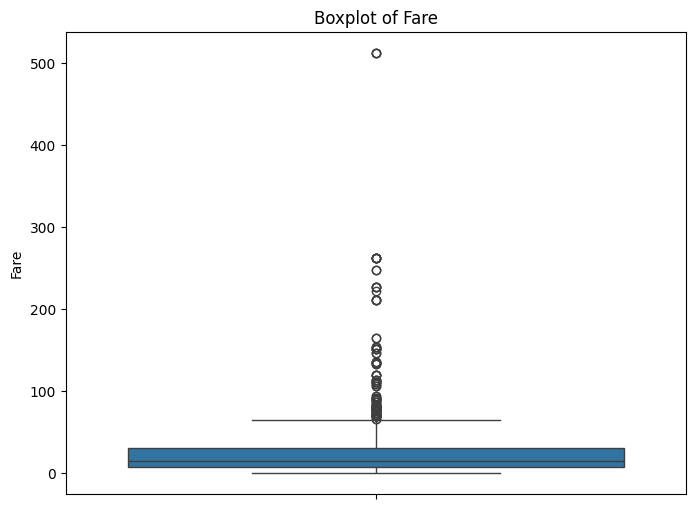

In [14]:
# Boxplot to identify outliers and visualize the spread of numerical attributes.

for i in df.columns:
  if df[i].dtype== "int64" or df[i].dtype== "float64":
    plt.figure(figsize=[8,6])
    sns.boxplot(df[i])
    plt.title(f"Boxplot of {i}")
    plt.show()

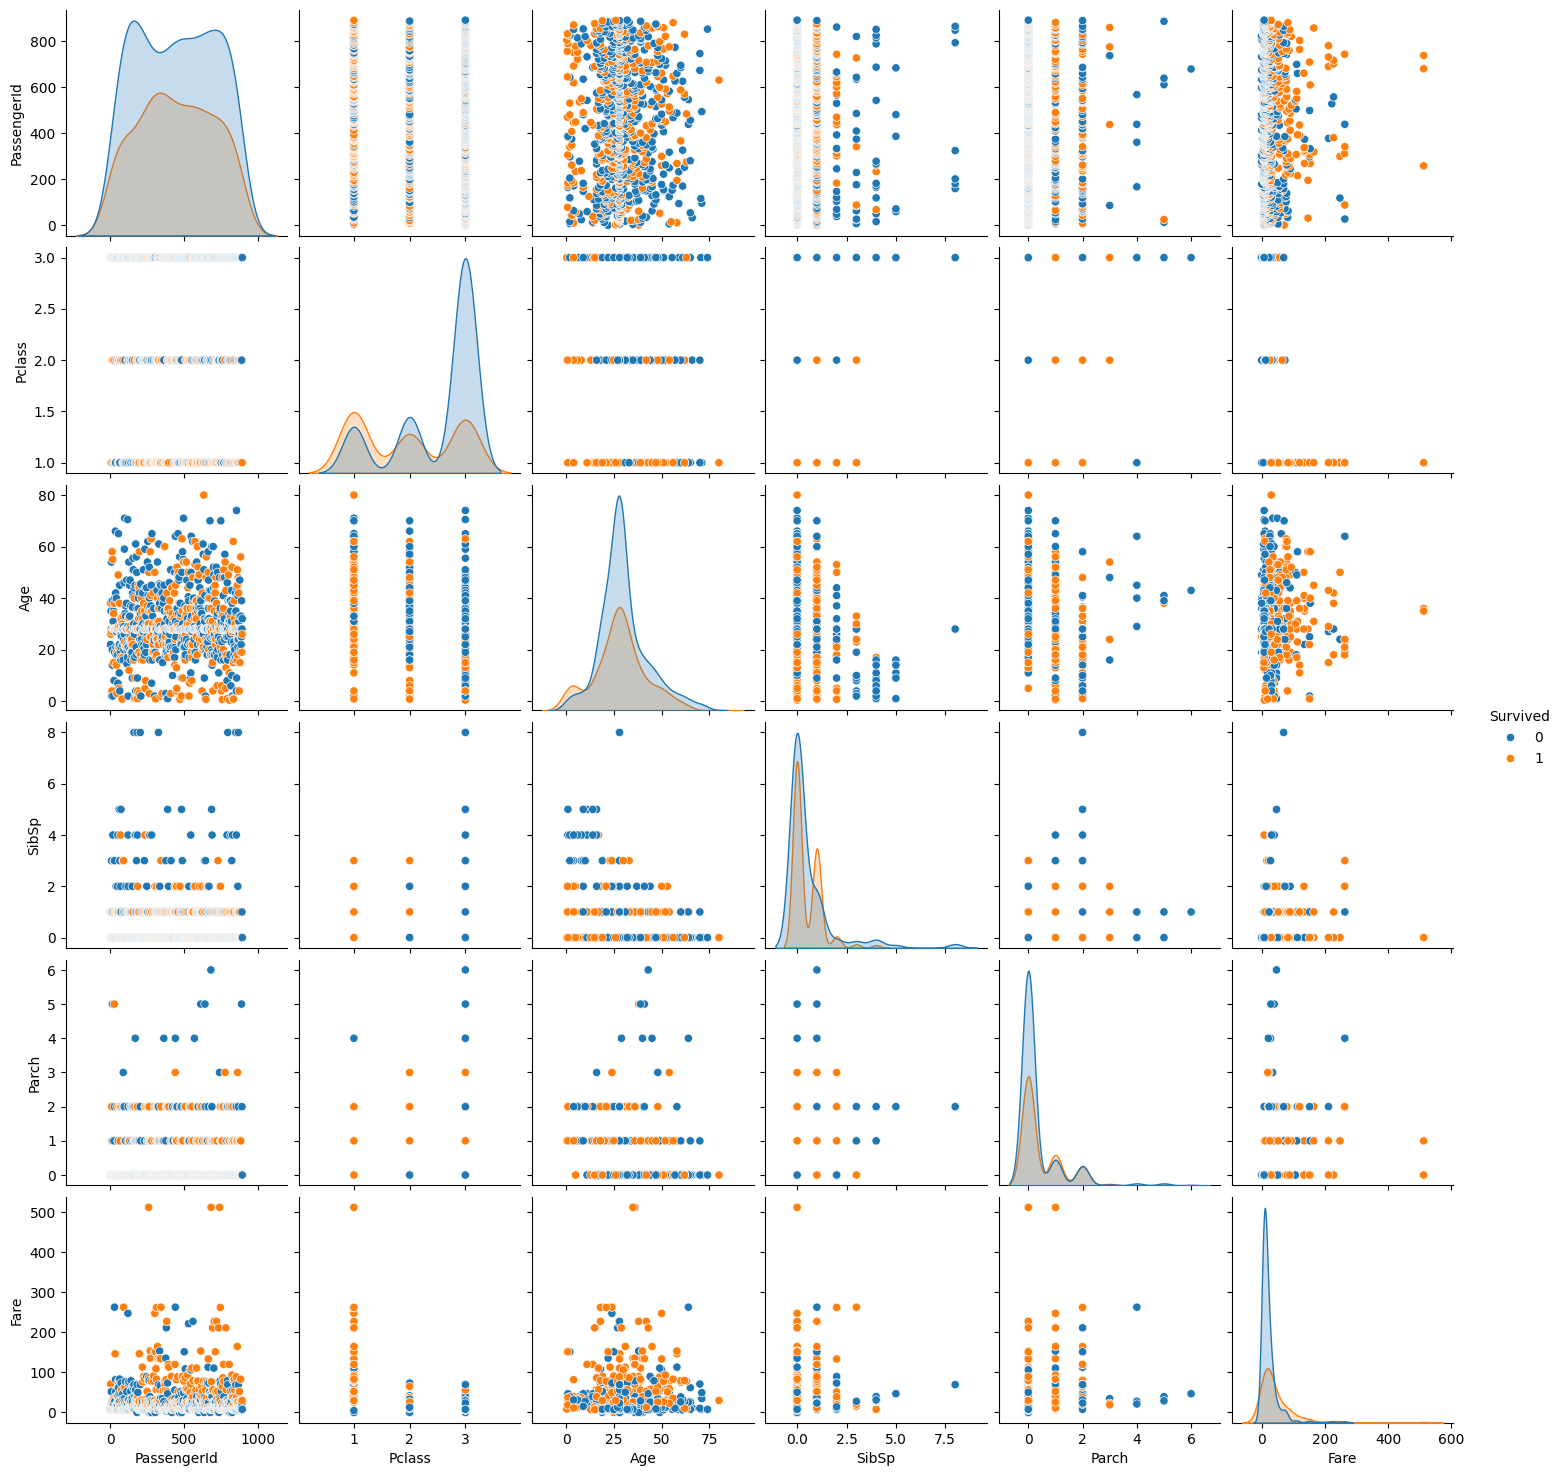

In [15]:
# Pairwise relationships between numerical attributes using pair plots.

sns.pairplot(data= df, hue= "Survived")

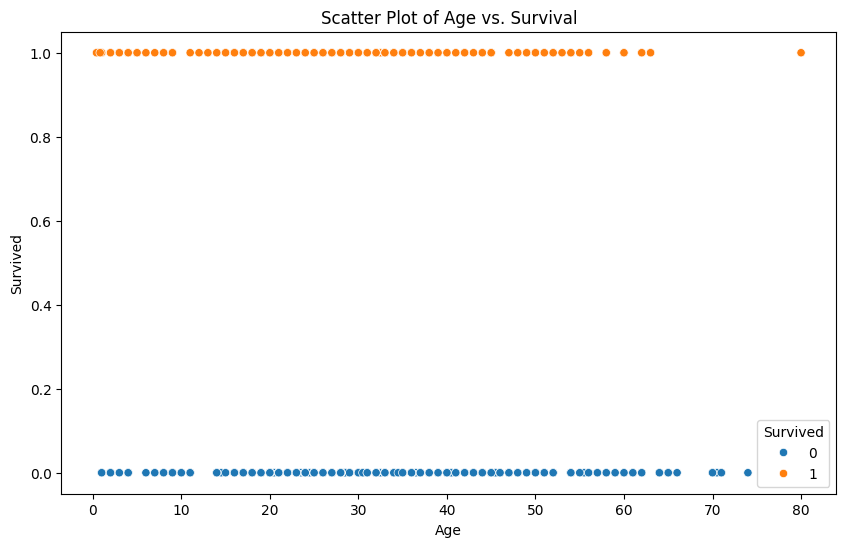

In [16]:
# Scatter plot of age vs. survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Survived', data=df, hue='Survived')
plt.title('Scatter Plot of Age vs. Survival')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

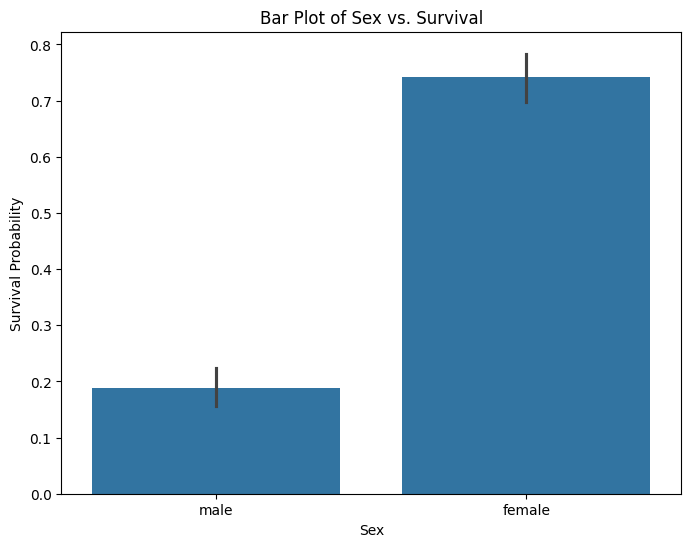

In [17]:
# Bar plot of sex vs. survival
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Bar Plot of Sex vs. Survival')
plt.xlabel('Sex')
plt.ylabel('Survival Probability')
plt.show()

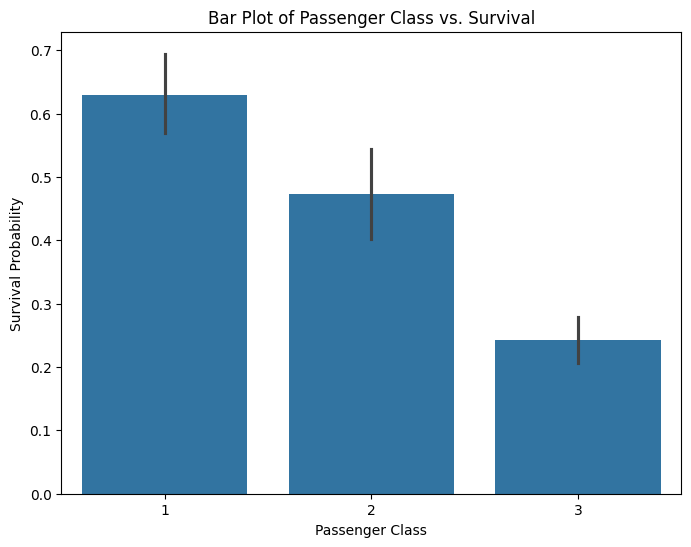

In [18]:
# Bar plot of passenger class (Pclass) vs. survival
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Bar Plot of Passenger Class vs. Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability')
plt.show()

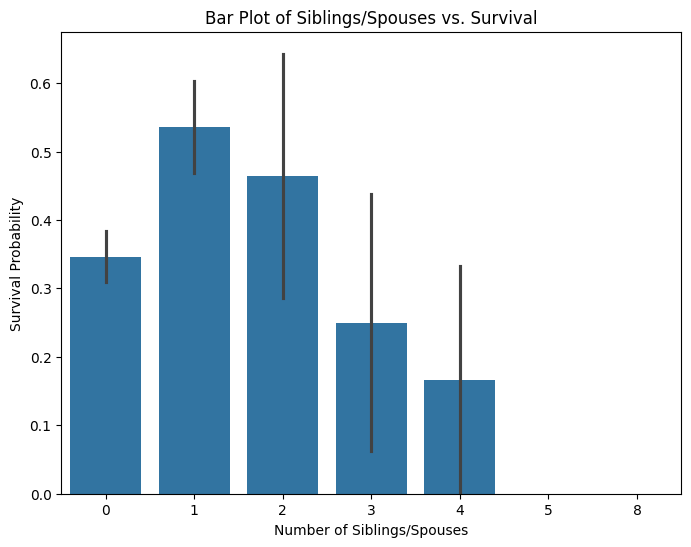

In [19]:
# Bar plot of number of siblings/spouses (SibSp) vs. survival
plt.figure(figsize=(8, 6))
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Bar Plot of Siblings/Spouses vs. Survival')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Probability')
plt.show()

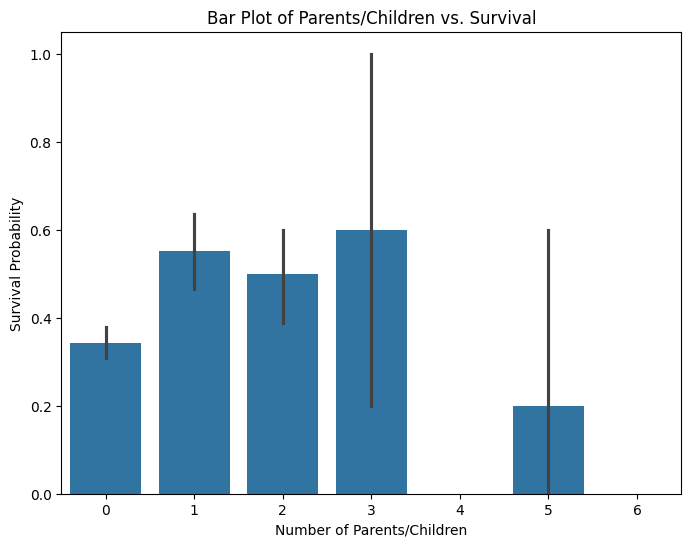

In [20]:
# Bar plot of number of parents/children (Parch) vs. survival
plt.figure(figsize=(8, 6))
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Bar Plot of Parents/Children vs. Survival')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Probability')
plt.show()

# **2. Data Preprocessing:**

In [21]:
# Embarked column has both int and str data type so converting all values to str

df['Embarked'] = df['Embarked'].astype(str)


In [22]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

LE= LabelEncoder()

for i  in df.columns:
  if df[i].dtype== "object":
    df[i]= LE.fit_transform(df[i])

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,3
3,4,1,1,0,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3


# **3. Building Predictive Models:**

In [24]:
# Assigning X and Y variables

y= df["Survived"]

x= df.drop("Survived", axis= 1)
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,3
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,3
3,4,1,0,35.0,1,0,53.1000,3
4,5,3,1,35.0,0,0,8.0500,3


In [25]:
# Data partition

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.30)

In [26]:
# pip install xgboost

In [27]:
#!pip install scikit-learn

In [28]:
# Model fitting (XGboost with cross validation)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

xgb_clf= XGBClassifier(n_estimators=100,
                       reg_lambda= 25,
                       gamma=4,
                       learning_rate=2)

training_score=[]
testing_score=[]

for i in range(1,101):
  x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.30, random_state=i)
  xgb_clf.fit(x_train,y_train)
  y_pred_train= xgb_clf.predict(x_train)
  y_pred_test= xgb_clf.predict(x_test)
  training_score.append(accuracy_score(y_train, y_pred_train))
  testing_score.append(accuracy_score(y_test, y_pred_test))
print("Accuracy score of train:",np.mean(training_score).round(2))
print("Accuracy score of test:",np.mean(testing_score).round(2))

Accuracy score of train: 0.82
Accuracy score of test: 0.8


In [29]:
# GridsearchCV for hyperparamter tunning for XGBoost

from sklearn.model_selection import GridSearchCV

param_grid= {"n_estimators": [100,200,300],
             "reg_lambda": [21,23,25,27],
             "gamma": [2,3,4],
             "learning_rate": [1,1.5,2]}
grid_search= GridSearchCV(xgb_clf, param_grid, cv=5)
grid_search.fit(x_train,y_train)
best_params= grid_search.best_params_
print("Best parameters:", best_params)

y_pred_train= grid_search.predict(x_train)
y_pred_test= grid_search.predict(x_test)

training_score= accuracy_score(y_train,y_pred_train)
testing_score= accuracy_score(y_test,y_pred_test)

print("Accuracy score of train:",training_score.round(2))
print("Accuracy score of test:",testing_score.round(2))

Best parameters: {'gamma': 2, 'learning_rate': 1, 'n_estimators': 100, 'reg_lambda': 25}
Accuracy score of train: 0.83
Accuracy score of test: 0.78


In [30]:
# Multiple classification metrics for XGBM

from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix= confusion_matrix(y_test, y_pred_test)
classification_report= classification_report(y_test, y_pred_test)
print(confusion_matrix)
print(classification_report)

[[138  21]
 [ 38  71]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       159
           1       0.77      0.65      0.71       109

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [57]:
# Metrics

accuracy_xgb = accuracy_score(y_test, y_pred_test)
precision_xgb = precision_score(y_test, y_pred_test, average='macro')
recall_xgb = recall_score(y_test, y_pred_test, average='macro')
f1_xgb= f1_score(y_test, y_pred_test)
print("Accuracy of XGB(test):",accuracy_xgb.round(2))
print("Precision of XGB(test):",precision_xgb.round(2))
print("Recall of XGB(test):",recall_xgb.round(2))
print("F1 of XGB(test):",f1_xgb.round(2))

Accuracy of XGB(test): 0.79
Precision of XGB(test): 0.79
Recall of XGB(test): 0.77
F1 of XGB(test): 0.72


In [31]:
#pip install lightgbm

In [45]:
# Model fitting (LightGBM with cross validation)

import lightgbm as lgb

lgb_clf= lgb.LGBMClassifier(n_estimators= 300,
                            reg_alpha=0.01,
                            reg_lambda=0.01,
                            learning_rate=0.01,)

training_score=[]
testing_score=[]

for i in range(1,101):
  x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.30, random_state=i)
  lgb_clf.fit(x_train,y_train)
  y_pred_train= lgb_clf.predict(x_train)
  y_pred_test= lgb_clf.predict(x_test)
  training_score.append(accuracy_score(y_train, y_pred_train))
  testing_score.append(accuracy_score(y_test, y_pred_test))
print("Accuracy score of train:",np.mean(training_score).round(2))
print("Accuracy score of test:",np.mean(testing_score).round(2))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [44]:
# GridsearchCV for hyperparamter tunning for LightGBM

from sklearn.model_selection import GridSearchCV

param_grid= {"n_estimators": [100,200,300],
             "reg_lambda": [0.1,0.01,0.5],
             "reg_alpha": [0.1,0.01,0.5],
             "learning_rate": [0.1,0.01,0.5]}
grid_search= GridSearchCV(lgb_clf, param_grid, cv=5)
grid_search.fit(x_train,y_train)
best_params= grid_search.best_params_
print("Best parameters:", best_params)

y_pred_train= grid_search.predict(x_train)
y_pred_test= grid_search.predict(x_test)

training_score= accuracy_score(y_train,y_pred_train)
testing_score= accuracy_score(y_test,y_pred_test)

print("Accuracy score of train:",training_score.round(2))
print("Accuracy score of test:",testing_score.round(2))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive g

In [50]:
# Multiple classification metrics for LightGBM

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix= confusion_matrix(y_test,y_pred_test)
print(confusion_matrix)

[[140  19]
 [ 37  72]]


In [51]:
classification_report=classification_report(y_test,y_pred_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       159
           1       0.79      0.66      0.72       109

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [60]:
# Metrics

accuracy_lgb = accuracy_score(y_test, y_pred_test)
precision_lgb = precision_score(y_test, y_pred_test, average='macro')
recall_lgb = recall_score(y_test, y_pred_test, average='macro')
f1_lgb= f1_score(y_test, y_pred_test)
print("Accuracy of LGB(test):",accuracy_lgb.round(2))
print("Precision of LGB(test):",precision_lgb.round(2))
print("Recall of LGB(test):",recall_lgb.round(2))
print("F1 of LGB(test):",f1_lgb.round(2))

Accuracy of LGB(test): 0.79
Precision of LGB(test): 0.79
Recall of LGB(test): 0.77
F1 of LGB(test): 0.72


In [62]:
# Creating a dataframe of the metrics

results = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM'],
    'Accuracy': [accuracy_xgb, accuracy_lgb],
    'Precision': [precision_xgb, precision_lgb],
    'Recall': [recall_xgb, recall_lgb],
    'F1': [f1_xgb, f1_lgb]})
results

,Model,Accuracy,Precision,Recall,F1
0,XGBoost,0.791045,0.791085,0.770527,0.72
1,LightGBM,0.791045,0.791085,0.770527,0.72


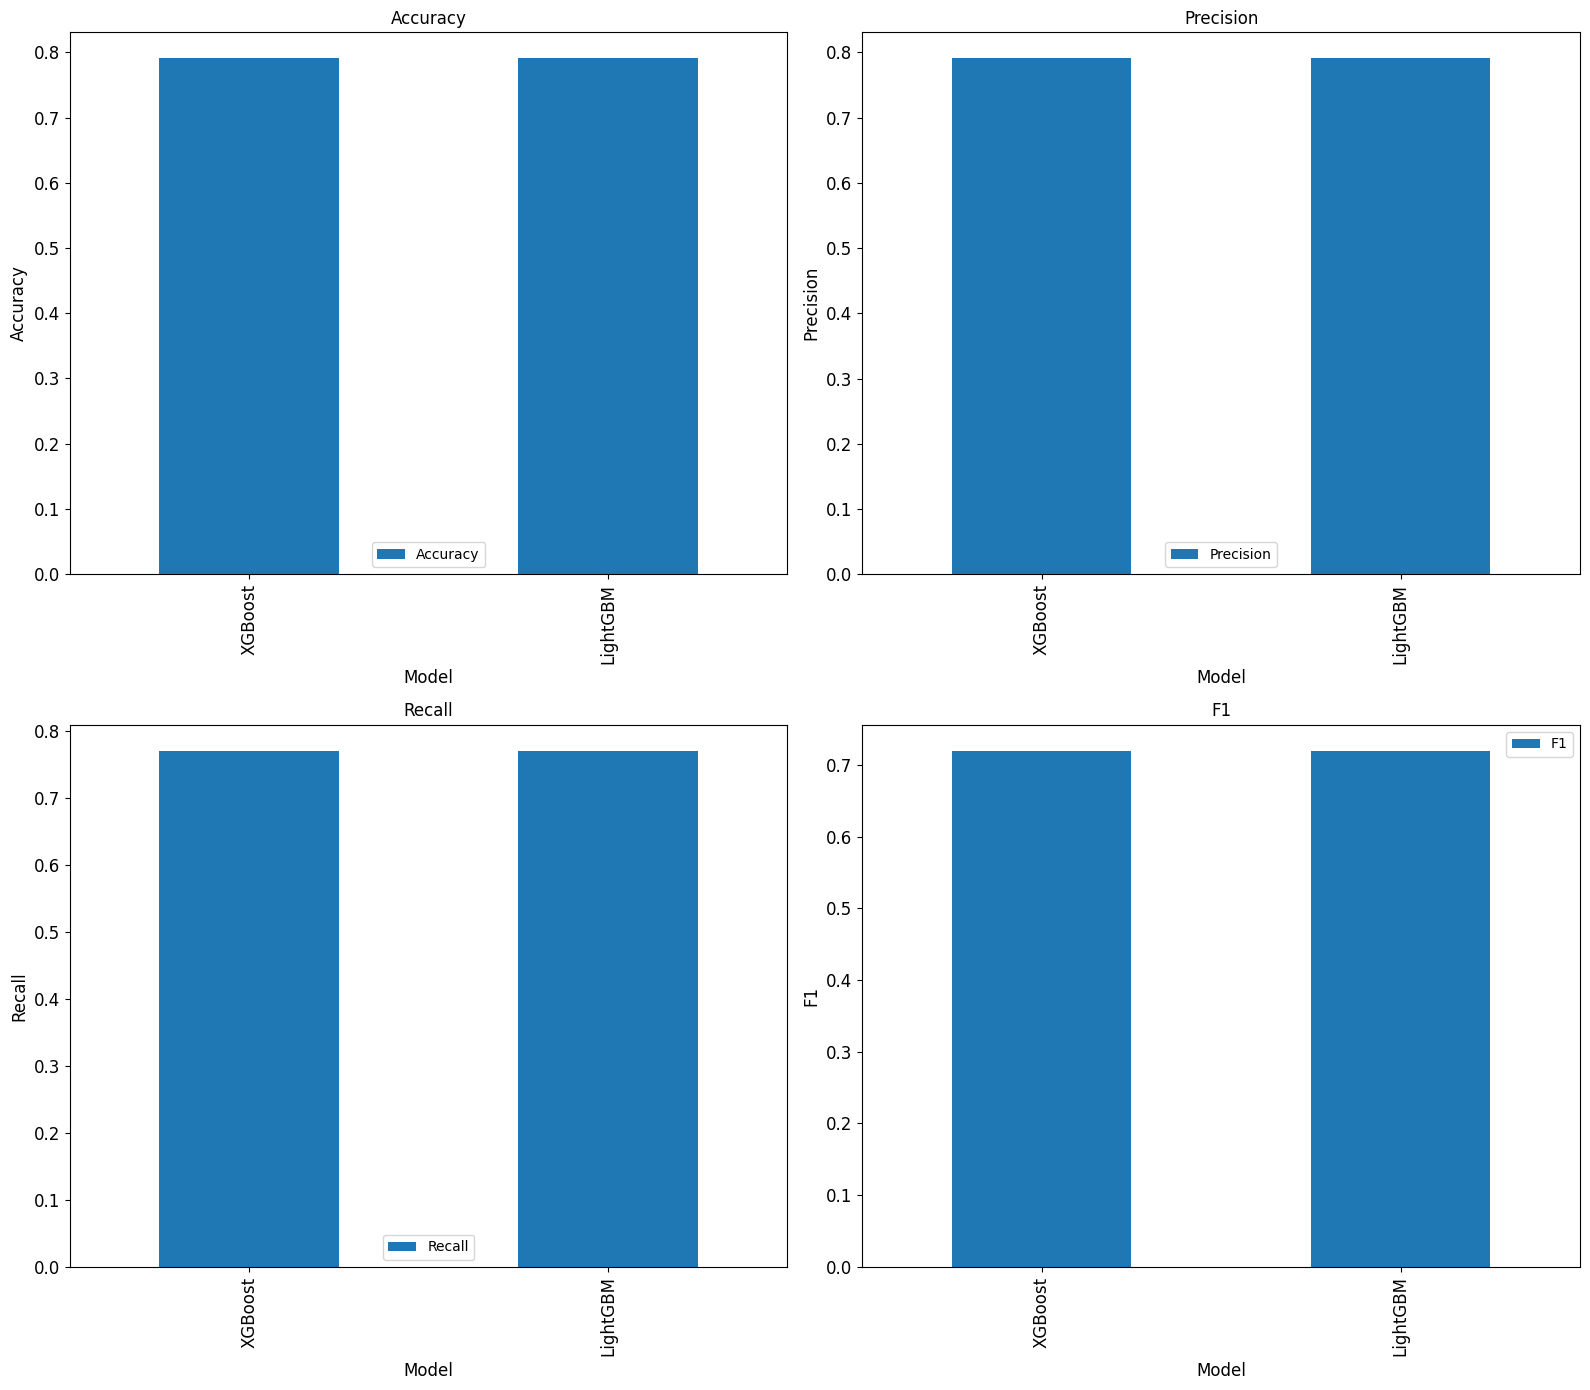

In [69]:
# Visualizing the results

plt.figure(figsize=(16, 14))

plt.subplot(2, 2, 1)
results.plot(x='Model', y='Accuracy', kind='bar', ax=plt.gca())
plt.title('Accuracy')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 2, 2)
results.plot(x='Model', y='Precision', kind='bar', ax=plt.gca())
plt.title('Precision')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 2, 3)
results.plot(x='Model', y='Recall', kind='bar', ax=plt.gca())
plt.title('Recall')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 2, 4)
results.plot(x='Model', y='F1', kind='bar', ax=plt.gca())
plt.title('F1')
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


After comparing the results, I observed that both XGBoost (XGBM) and LightGBM (LGBM) models achieved similar accuracy levels, with XGBM achieving around 80% accuracy and LGBM achieving approximately 82%. However, there was a higher variance of 7% in the accuracy of the LGBM model compared to only 2% variance in the XGBM model. Consequently, I have decided to finalize the XGBM model.